In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from datasets import load_dataset,load_from_disk

                            instruction  \
0  How many seconds are in 7.8 minutes?   
1  How many seconds are in 7.8 minutes?   
2  How many seconds are in 7.8 minutes?   
3  How many seconds are in 7.8 minutes?   
4  How many seconds are in 7.8 minutes?   

                                           responses  \
0                                                 []   
1  [7.8 minutes is the same as 7 minutes and 0.8 ...   
2  [7.8 minutes is the same as 7 minutes and 0.8 ...   
3  [7.8 minutes is the same as 7 minutes and 0.8 ...   
4  [7.8 minutes is the same as 7 minutes and 0.8 ...   

                                       next_response answer  \
0  7.8 minutes is the same as 7 minutes and 0.8 m...   None   
1  Right, and since there are 60 seconds in a min...   None   
2  And since there are 60 seconds in a minute, th...   None   
3  So, in total, there are 420 + 48 = 468 seconds...   None   
4  Right. Let's check our work. 7.8 minutes is th...   None   

   is_human_response  is_

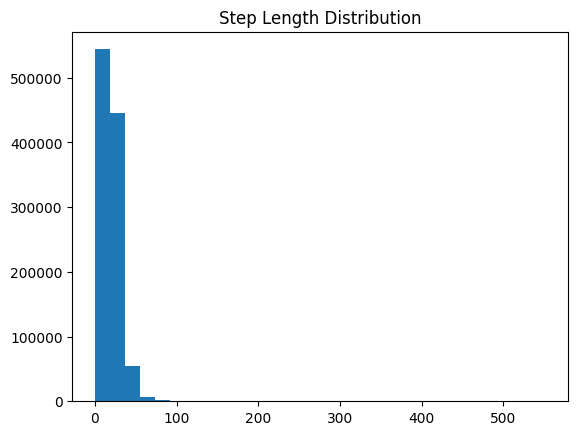

                                               instruction  \
1054804  The radius of a sphere is $p$ units and the ra...   
767002       Solve over the integers: $$2^a+4^b+8^c=328.$$   
321134   Find all values of $a$ so that the lines speci...   

                                             next_response  
1054804  We know that the formula for the volume of a s...  
767002   Now I can equate the two sides of the equation...  
321134   So I have found a solution for $t$ and $u$, wh...  
                                               instruction  \
25540    How many three-digit numbers satisfy the prope...   
1051899  A fair 6-sided die is rolled.  If the roll is ...   
420547   Let  \[f(x) =\n\begin{cases}\nk(x) &\text{if }...   

                                             next_response  
25540              We also know that $a+b=8$ from earlier.  
1051899  So we just need to find the average of the pos...  
420547                Let me try this and see if it works.  


In [22]:
# Load dataset
with open('../data/prm800k_stepwise_critic_split/train.jsonl', encoding='utf-8') as f:
    data = [json.loads(line) for line in f]

df = pd.DataFrame(data)

# Basic stats
print(df.head())
print(df['rating'].value_counts())
print(df['is_human_response'].value_counts())

# Step length distribution
df['step_length'] = df['next_response'].apply(lambda x: len(x.split()))
plt.hist(df['step_length'], bins=30)
plt.title('Step Length Distribution')
plt.show()

# Example correct/incorrect steps
print(df[df['rating'] == 1].sample(3)[['instruction','next_response']])
print(df[df['rating'] == 0].sample(3)[['instruction','next_response']])
